# 04 Markowitz Portfolio Optimization

- 1952, Harry Markowitz published a papper
  - Summary : You should not invest all in the same asset type
  - Investors interested in the highest return
  - Investment in multiple securities should be studied as portfolio
  - Calculating efficient frontier of group of portfolios 
  


In [64]:
# CALCULATE Portfolio Efficientcy

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# magic function
# specific for jupyter notebook
# Facilitates plotting matplotlib graphs just below code cells and 
# storing them in the notebook document 
%matplotlib inline


In [65]:
assets = ['PG', '^GSPC']  # Microsoft with S&P 500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2015-01-01')['Adj Close']

pf_data.tail()

,PG,^GSPC
Date,,
2020-07-28,127.879997,3218.439941
2020-07-29,128.309998,3258.439941
2020-07-30,131.419998,3246.219971
2020-07-31,131.119995,3271.120117
2020-08-03,131.289993,3294.610107


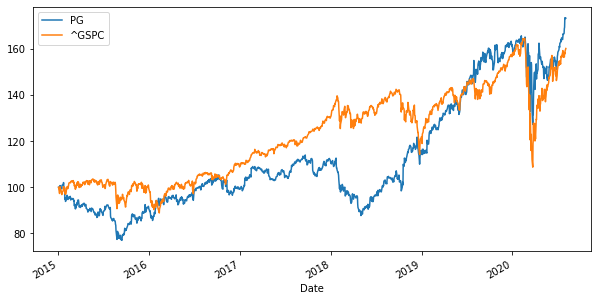

In [66]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [67]:
log_returns = np.log(pf_data / pf_data.shift(1))

print(log_returns.mean()* 250) # yearly mean
print(log_returns.cov() * 250)
print(log_returns.corr())


PG       0.097731
^GSPC    0.083711
dtype: float64
             PG    ^GSPC
PG     0.038666  0.02289
^GSPC  0.022890  0.03530
             PG     ^GSPC
PG     1.000000  0.619584
^GSPC  0.619584  1.000000


In [68]:
num_assets = len(assets)
weights = np.random.random(num_assets)  # create random weights - will sum up to 1
weights /= np.sum(weights)   # remember, here is the trick : w = w / sum(w)
weights

array([0.72199183, 0.27800817])

In [69]:
weights[0] + weights[1] == 1   

True

Expected Portfolio return:

In [70]:
np.sum(weights * log_returns.mean()) * 250

0.09383359674883135

Expected Portfolio Variance:

In [71]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03207266465624858

Expected Portfolio Volatility:

In [72]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.179088426918795

<b>NOTE:</b>
- Here we are not considering 1000 different investments, instead, we are considering 1000 different combinations (weights in this case) of the same asset 
- The idea is the find the most efficient combination(x% MSFT, y% S&P500) for the asset (portfolio)

In [73]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)  # create random weights - will sum up to 1
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

# before plotting, we need to convert the values into array
pfolio_returns = np.array(pfolio_returns) 
pfolio_volatilities = np.array(pfolio_volatilities)
   

In [74]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility' : pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.089005,0.173051
1,0.090658,0.172979
2,0.090836,0.173107
3,0.094200,0.180297
4,0.093871,0.179206


Text(0.5, 1.0, 'Efficient Frontier')

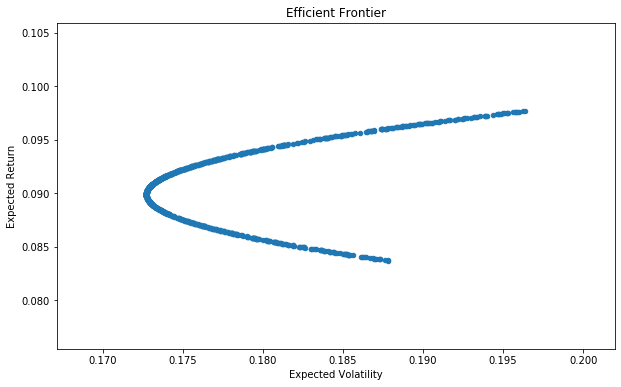

In [75]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')